In [196]:
import pandas as pd
from fractions import Fraction

# Import Data

In [197]:
commits = pd.read_csv("../inputs-outputs/commits.csv")
commits

,PathFile,Commit hash,Commit timestamp,Subject
0,CHANGELOG.md,6363d5171d3faaef66485db1fec244b5b6b0feee,1678214482,release: 10.0.0 (#5975)
1,package.json,6363d5171d3faaef66485db1fec244b5b6b0feee,1678214482,release: 10.0.0 (#5975)
2,angular.json,b1a9a682b8a05a1bf2ac0553bd2cf12f52052d2c,1678213587,feat: update to Angular 14 (#5973)
3,package-lock.json,b1a9a682b8a05a1bf2ac0553bd2cf12f52052d2c,1678213587,feat: update to Angular 14 (#5973)
4,package.json,b1a9a682b8a05a1bf2ac0553bd2cf12f52052d2c,1678213587,feat: update to Angular 14 (#5973)
...,...,...,...,...
2531,src/app/pages/pages.module.ts,ed658566b3f15f402b10bf9b44cc02921eb9653f,1492183858,refator(@theme): add menu transclusion in one-...
2532,src/app/app.component.scss,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout
2533,src/app/app.component.ts,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout
2534,src/app/app.module.ts,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout


In [198]:
metrics = pd.read_csv("../inputs-outputs/metrics.csv", sep=';')
metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,MapsComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,9,0,0,0,0
1,TypographyComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,8,0,0,0,0
2,UiFeaturesModule,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,18,0,0,0,0
3,TreeComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,1,0,31,1,0,0,0
4,TablesRoutingModule,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...
69,TabsComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,1,0,20,1,0,0,0
70,EchartsPieComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,1,0,60,1,0,0,0
71,DashboardComponent,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,93,0,0,0,0
72,ComponentsRoutingModule,/home/school/MGL843/repos/ngx-admin/src/app/pa...,0,0,6,0,0,0,0


In [199]:
projects = pd.read_csv("../inputs-outputs/pharo_inputs.csv")
projects

,Project,Source,Model
0,ngx-admin,/home/school/MGL843/repos/ngx-admin,/home/school/MGL843/models/ngx-model.json


# Preprocess Data

Let keep only commits fixing issues and get their frequency per file.

In [200]:
fix_commits = commits[commits["Subject"].str.startswith("fix")]
fix_count = pd.DataFrame(fix_commits["PathFile"].value_counts())
fix_count.columns = ["FixCount"]
fix_count

,FixCount
src/app/pages/dashboard/temperature/temperature.component.scss,16
src/app/pages/ui-features/buttons/buttons.component.scss,15
src/app/pages/dashboard/electricity/electricity.component.scss,12
src/app/@theme/components/header/header.component.scss,12
src/app/pages/ui-features/buttons/button-groups/button-groups.component.html,11
...,...
.github/workflows/demoDeploy.yml,1
.github/workflows/ACTION_TRIGGER_GUIDE.md,1
src/app/@theme/styles/variables.scss,1
src/app/pages/charts/chartjs/chartjs.component.html,1


Lets modify paths in the metrics data so that it matches the commit data.

In [201]:
for path in projects["Source"]:
    metrics["PathFile"] = metrics["PathFile"].str.removeprefix(path + '/')

metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,MapsComponent,src/app/pages/maps/maps.component.ts,0,0,9,0,0,0,0
1,TypographyComponent,src/app/pages/ui-features/typography/typograph...,0,0,8,0,0,0,0
2,UiFeaturesModule,src/app/pages/ui-features/ui-features.module.ts,0,0,18,0,0,0,0
3,TreeComponent,src/app/pages/components/tree/tree.component.ts,1,0,31,1,0,0,0
4,TablesRoutingModule,src/app/pages/tables/tables-routing.module.ts,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...
69,TabsComponent,src/app/pages/ui-features/tabs/tabs.component.ts,1,0,20,1,0,0,0
70,EchartsPieComponent,src/app/pages/charts/echarts/pie/pie.component.ts,1,0,60,1,0,0,0
71,DashboardComponent,src/app/pages/dashboard/dashboard.component.ts,0,0,93,0,0,0,0
72,ComponentsRoutingModule,src/app/pages/components/components-routing.mo...,0,0,6,0,0,0,0


Lets assign all files to a single class by dropping all files containing more than one class. We can then use this column as the index.

In [202]:
metrics = metrics[metrics["PathFile"].duplicated() == False]
metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,MapsComponent,src/app/pages/maps/maps.component.ts,0,0,9,0,0,0,0
1,TypographyComponent,src/app/pages/ui-features/typography/typograph...,0,0,8,0,0,0,0
2,UiFeaturesModule,src/app/pages/ui-features/ui-features.module.ts,0,0,18,0,0,0,0
3,TreeComponent,src/app/pages/components/tree/tree.component.ts,1,0,31,1,0,0,0
4,TablesRoutingModule,src/app/pages/tables/tables-routing.module.ts,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...
68,ChartsComponent,src/app/pages/charts/charts.component.ts,0,0,9,0,0,0,0
70,EchartsPieComponent,src/app/pages/charts/echarts/pie/pie.component.ts,1,0,60,1,0,0,0
71,DashboardComponent,src/app/pages/dashboard/dashboard.component.ts,0,0,93,0,0,0,0
72,ComponentsRoutingModule,src/app/pages/components/components-routing.mo...,0,0,6,0,0,0,0


Let convert the LCOM column to float.

In [203]:
metrics["LCOM"] = metrics["LCOM"].str.strip("()").map(Fraction).astype('float')
metrics.dtypes

/tmp/ipykernel_31035/988908567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["LCOM"] = metrics["LCOM"].str.strip("()").map(Fraction).astype('float')


Class          object
PathFile       object
Attributes      int64
Methods         int64
LOC             int64
NOC             int64
fanOut          int64
WMC             int64
LCOM          float64
dtype: object

## Join the datasets

Lets associate each class to the the number of time it has been fixed. 

In [204]:
joined_data = metrics.join(fix_count, on="PathFile")
joined_data["FixCount"] = joined_data["FixCount"].fillna(0)
joined_data

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM,FixCount
0,MapsComponent,src/app/pages/maps/maps.component.ts,0,0,9,0,0,0,0.0,0.0
1,TypographyComponent,src/app/pages/ui-features/typography/typograph...,0,0,8,0,0,0,0.0,1.0
2,UiFeaturesModule,src/app/pages/ui-features/ui-features.module.ts,0,0,18,0,0,0,0.0,1.0
3,TreeComponent,src/app/pages/components/tree/tree.component.ts,1,0,31,1,0,0,0.0,1.0
4,TablesRoutingModule,src/app/pages/tables/tables-routing.module.ts,0,0,6,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68,ChartsComponent,src/app/pages/charts/charts.component.ts,0,0,9,0,0,0,0.0,0.0
70,EchartsPieComponent,src/app/pages/charts/echarts/pie/pie.component.ts,1,0,60,1,0,0,0.0,0.0
71,DashboardComponent,src/app/pages/dashboard/dashboard.component.ts,0,0,93,0,0,0,0.0,2.0
72,ComponentsRoutingModule,src/app/pages/components/components-routing.mo...,0,0,6,0,0,0,0.0,1.0


In [205]:
X = joined_data[["Attributes", "Methods", "LOC", "NOC", "fanOut", "WMC", "LCOM"]]
y = joined_data["FixCount"]

In [206]:
X.corr()

,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
Attributes,1.000000,0.225278,0.232064,0.955534,0.072818,0.136034,0.381638
Methods,0.225278,1.000000,0.185809,0.502561,0.198479,0.865775,0.770458
LOC,0.232064,0.185809,1.000000,0.262159,0.084133,0.241489,0.075955
NOC,0.955534,0.502561,0.262159,1.000000,0.124686,0.382746,0.571834
fanOut,0.072818,0.198479,0.084133,0.124686,1.000000,0.144410,-0.027130
WMC,0.136034,0.865775,0.241489,0.382746,0.144410,1.000000,0.767215
LCOM,0.381638,0.770458,0.075955,0.571834,-0.027130,0.767215,1.000000


array([[<AxesSubplot:title={'center':'Attributes'}>,
        <AxesSubplot:title={'center':'Methods'}>,
        <AxesSubplot:title={'center':'LOC'}>],
       [<AxesSubplot:title={'center':'NOC'}>,
        <AxesSubplot:title={'center':'fanOut'}>,
        <AxesSubplot:title={'center':'WMC'}>],
       [<AxesSubplot:title={'center':'LCOM'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

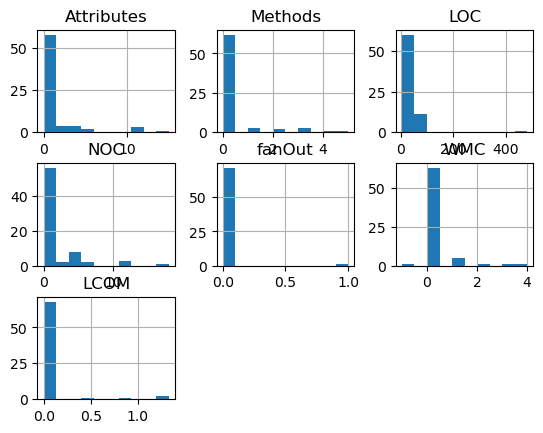

In [208]:
X.hist()